### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Reading data into jupyter notebook

In [2]:
df=pd.read_csv("D:/3-INTERNSHIP/AFAME technologies/Credit Card Fraud Project/fraudTrain.csv")

### View first 5 observations in the dataset

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### View data type and non null values of each variable

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

* unnamed column is not useful for further process
* trans_date_trans_time and dob variables should be converted from object to date time datatype

### Statistical measures of each variables

In [39]:
df['cc_num'].nunique()

983

In [5]:
df.describe().astype(int)

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
mean,648337,-2147483648,70,48800,38,-90,88824,1349243636,38,-90,0
std,374317,-2147483648,160,26893,5,13,301956,12841278,5,13,0
min,0,-2147483648,1,1257,20,-165,23,1325376018,19,-166,0
25%,324168,-2147483648,9,26237,34,-96,743,1338750742,34,-96,0
50%,648337,-2147483648,47,48174,39,-87,2456,1349249747,39,-87,0
75%,972505,-2147483648,83,72042,41,-80,20328,1359385375,41,-80,0
max,1296674,-2147483648,28948,99783,66,-67,2906700,1371816817,67,-66,1


**OBSERVATION**
* It seems that fraud category is very less because 25%, 50% and 75% of is fraud variable is 0
* Let's take a look why cc_num is same from min to max

In [6]:
df.describe(include=object)

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,1274791,693,14,352,481,2,983,894,51,494,968,1296675
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4,4403,131659,26669,28794,709863,3123,5617,94876,9779,5636,1


#### Removing Unnamed column

In [7]:
df = df.drop(columns=['Unnamed: 0'])

In [8]:
df['cc_num'].describe()

count    1.296675e+06
mean     4.171920e+17
std      1.308806e+18
min      6.041621e+10
25%      1.800429e+14
50%      3.521417e+15
75%      4.642255e+15
max      4.992346e+18
Name: cc_num, dtype: float64

* cc_num describe value shown same value(-2147483648) in code above
* This issue is because of changing datatype as integer. (-2147483648) This value is minimum value for a 32-bit signed integer.
* now without changing data type, it seems better.

In [9]:
# Create a pivot table
pivot_table = pd.pivot_table(
    df,
    values='cc_num',  # This column's values are used to count the transactions
    index='gender',
    columns='is_fraud',
    aggfunc='count',
    fill_value=0
)

# Rename the columns for clarity
pivot_table.columns = ['Valid Transactions', 'Fraud Transactions']

pivot_table

,Valid Transactions,Fraud Transactions
gender,,
F,706128,3735
M,583041,3771


In [10]:
# Create a pivot table
pivot_table = pd.pivot_table(
    df,
    values='cc_num',
    index='gender',
    columns='is_fraud',
    aggfunc='count',
    fill_value=0
)

# Rename the columns for clarity
pivot_table.columns = ['Valid Transactions', 'Fraud Transactions']

# Calculate the total transactions for each gender
pivot_table['Total Transactions'] = pivot_table['Valid Transactions'] + pivot_table['Fraud Transactions']

# Calculate the percentage of fraud transactions
pivot_table['Percentage Fraud Transactions'] = (pivot_table['Fraud Transactions'] / pivot_table['Total Transactions']) * 100

pivot_table

,Valid Transactions,Fraud Transactions,Total Transactions,Percentage Fraud Transactions
gender,,,,
F,706128,3735,709863,0.526158
M,583041,3771,586812,0.642625


* There is no big difference in fraud transactions for male and female 

In [12]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

df['trans_year'] = df['trans_date_trans_time'].dt.year
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_minute'] = df['trans_date_trans_time'].dt.minute
df['trans_second'] = df['trans_date_trans_time'].dt.second
df['trans_day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['trans_quarter'] = df['trans_date_trans_time'].dt.quarter

# Calculate age
today = pd.Timestamp.today()
df['age'] = today.year - df['dob'].dt.year

# Verify the changes
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_year', 'trans_month', 'trans_day',
       'trans_hour', 'trans_minute', 'trans_second', 'trans_day_of_week',
       'trans_quarter', 'age'],
      dtype='object')

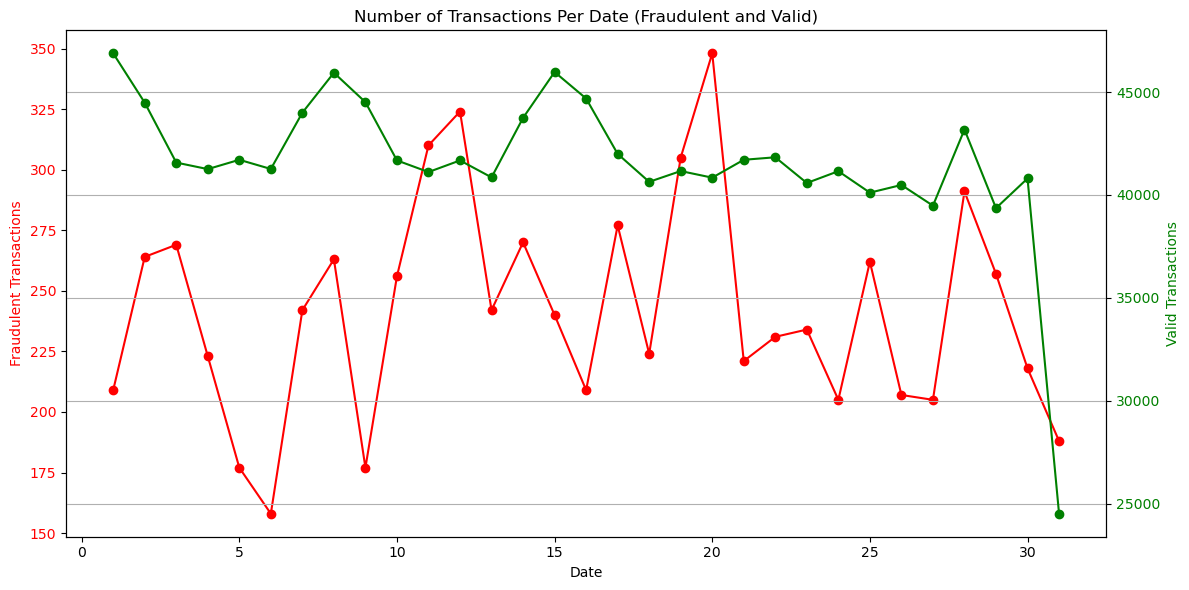

In [18]:
# Aggregate the number of fraudulent and valid transactions by date
fraud_transactions_per_date = df[df['is_fraud'] == 1].groupby('trans_day').size()
valid_transactions_per_date = df[df['is_fraud'] == 0].groupby('trans_day').size()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot fraudulent transactions
color = 'red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Fraudulent Transactions', color=color)
ax1.plot(fraud_transactions_per_date.index, fraud_transactions_per_date.values, marker='o', linestyle='-', color=color, label='Fraudulent Transactions')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot valid transactions
ax2 = ax1.twinx()
color = 'green'
ax2.set_ylabel('Valid Transactions', color=color)
ax2.plot(valid_transactions_per_date.index, valid_transactions_per_date.values, marker='o', linestyle='-', color=color, label='Valid Transactions')
ax2.tick_params(axis='y', labelcolor=color)

# Add titles and grid
plt.title('Number of Transactions Per Date (Fraudulent and Valid)')
fig.tight_layout()
plt.grid(True)

# Show the plot
plt.show()

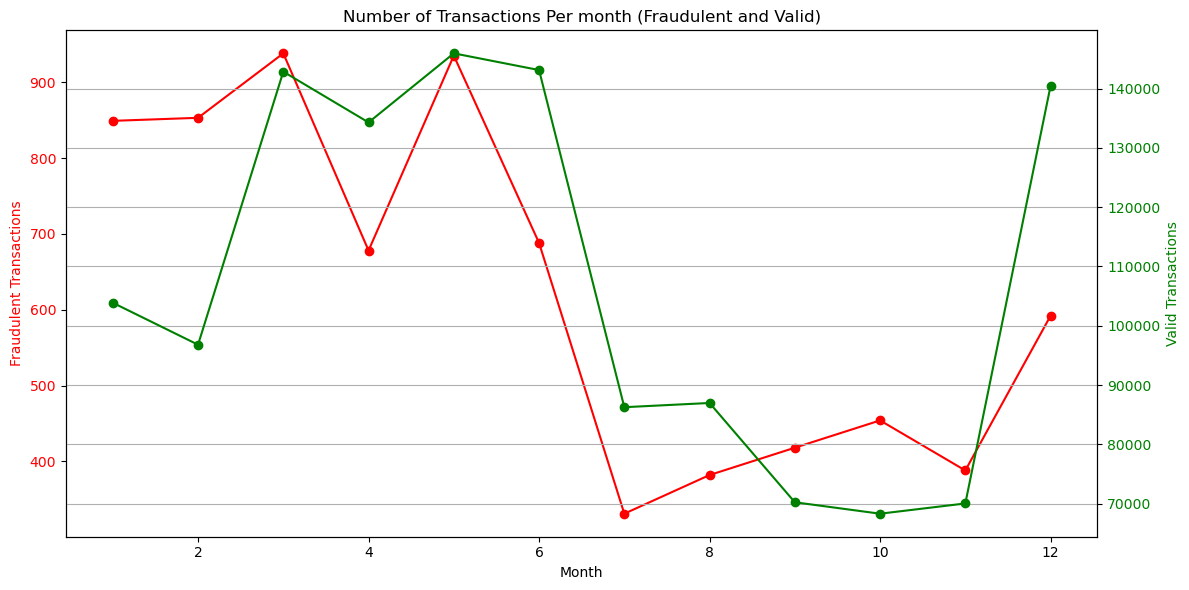

In [19]:
# Aggregate the number of fraudulent and valid transactions by date
fraud_transactions_per_month = df[df['is_fraud'] == 1].groupby('trans_month').size()
valid_transactions_per_month = df[df['is_fraud'] == 0].groupby('trans_month').size()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot fraudulent transactions
color = 'red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Fraudulent Transactions', color=color)
ax1.plot(fraud_transactions_per_month.index, fraud_transactions_per_month.values, marker='o', linestyle='-', color=color, label='Fraudulent Transactions')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot valid transactions
ax2 = ax1.twinx()
color = 'green'
ax2.set_ylabel('Valid Transactions', color=color)
ax2.plot(valid_transactions_per_month.index, valid_transactions_per_month.values, marker='o', linestyle='-', color=color, label='Valid Transactions')
ax2.tick_params(axis='y', labelcolor=color)

# Add titles and grid
plt.title('Number of Transactions Per month (Fraudulent and Valid)')
fig.tight_layout()
plt.grid(True)

# Show the plot
plt.show()

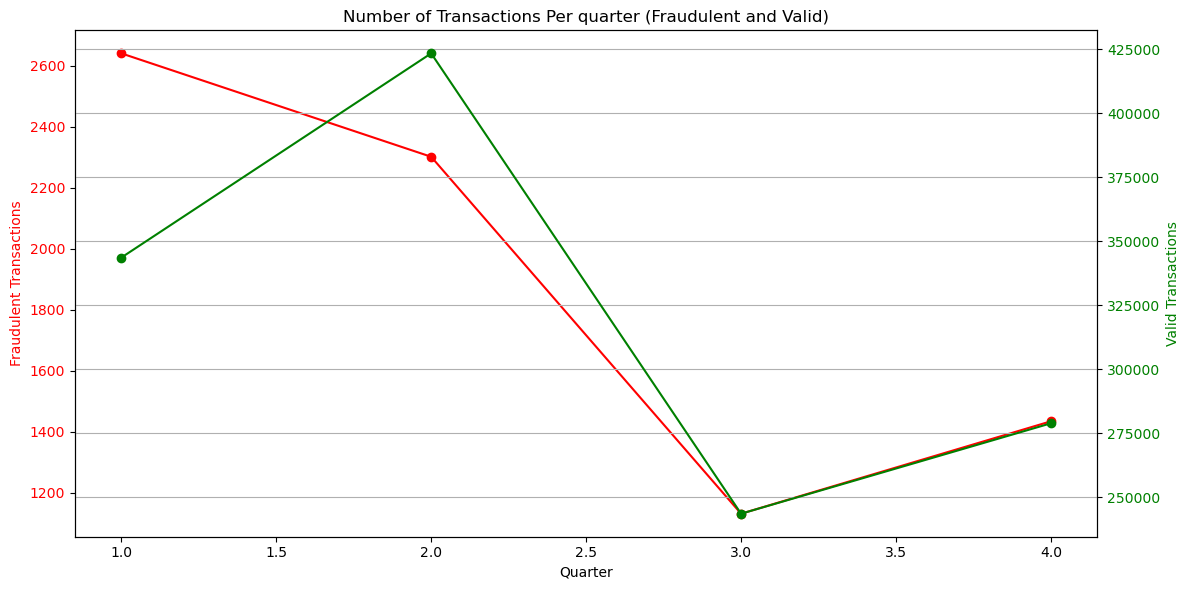

In [22]:
# Aggregate the number of fraudulent and valid transactions by date
fraud_transactions_per_quarter = df[df['is_fraud'] == 1].groupby('trans_quarter').size()
valid_transactions_per_quarter = df[df['is_fraud'] == 0].groupby('trans_quarter').size()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot fraudulent transactions
color = 'red'
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Fraudulent Transactions', color=color)
ax1.plot(fraud_transactions_per_quarter.index, fraud_transactions_per_quarter.values, marker='o', linestyle='-', color=color, label='Fraudulent Transactions')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot valid transactions
ax2 = ax1.twinx()
color = 'green'
ax2.set_ylabel('Valid Transactions', color=color)
ax2.plot(valid_transactions_per_quarter.index, valid_transactions_per_quarter.values, marker='o', linestyle='-', color=color, label='Valid Transactions')
ax2.tick_params(axis='y', labelcolor=color)

# Add titles and grid
plt.title('Number of Transactions Per quarter (Fraudulent and Valid)')
fig.tight_layout()
plt.grid(True)

# Show the plot
plt.show()

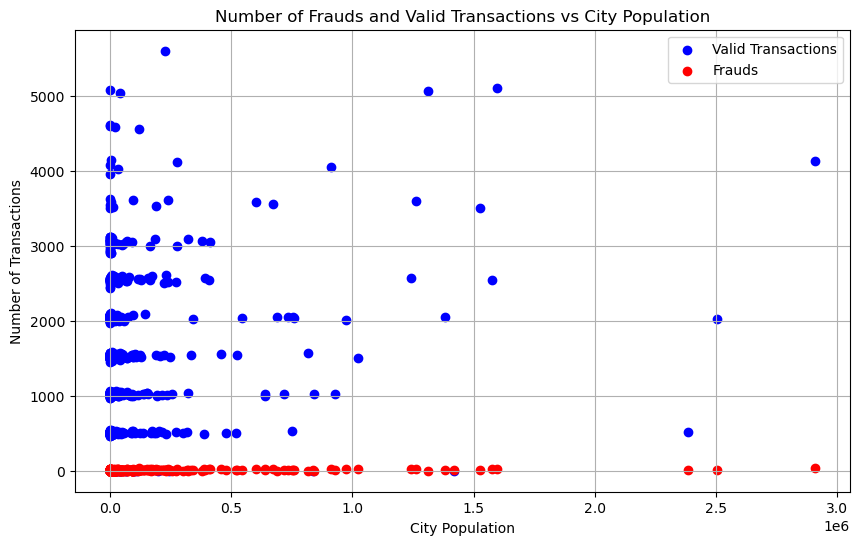

In [23]:
# Group by city and calculate the number of frauds and valid transactions
city_transactions = df.groupby('city')['is_fraud'].value_counts().unstack().fillna(0)

# Extract city population
city_population = df.groupby('city')['city_pop'].mean()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(city_population, city_transactions[0], color='blue', label='Valid Transactions')
plt.scatter(city_population, city_transactions[1], color='red', label='Frauds')
plt.xlabel('City Population')
plt.ylabel('Number of Transactions')
plt.title('Number of Frauds and Valid Transactions vs City Population')
plt.legend()
plt.grid(True)
plt.show()

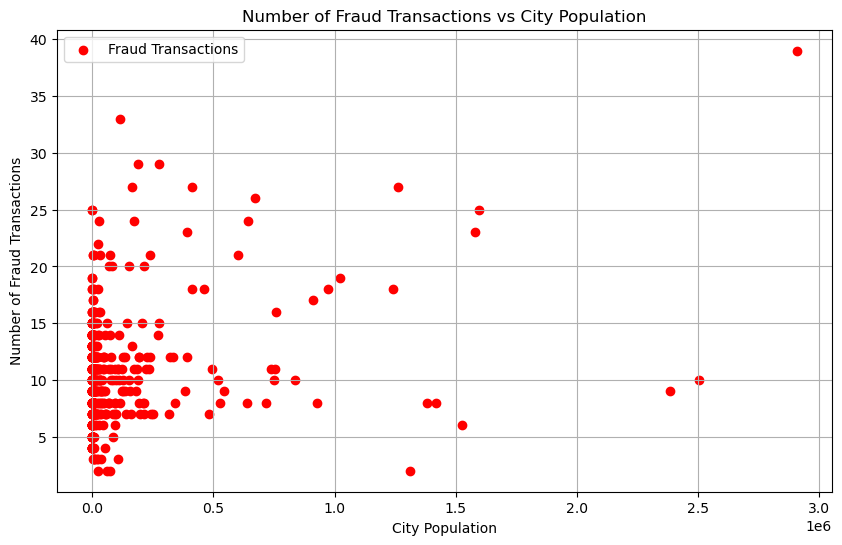

In [25]:
# Filter the dataset to include only fraud transactions
fraud_df = df[df['is_fraud'] == 1]

# Group by city and calculate the number of fraud transactions
city_fraud_transactions = fraud_df.groupby('city')['is_fraud'].count()

# Extract city population
city_population = fraud_df.groupby('city')['city_pop'].mean()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(city_population, city_fraud_transactions, color='red', label='Fraud Transactions')
plt.xlabel('City Population')
plt.ylabel('Number of Fraud Transactions')
plt.title('Number of Fraud Transactions vs City Population')
plt.legend()
plt.grid(True)
plt.show()

### Top 10 transactions

In [27]:
# Group by cc_num and sum the transaction amounts
transaction_sum_per_card = df.groupby('cc_num')['amt'].sum()

# Merge with the original dataframe to get the 'is_fraud' column
result = pd.merge(transaction_sum_per_card, df[['cc_num', 'is_fraud']], on='cc_num').drop_duplicates()

# Sort by transaction amount in descending order
result = result.sort_values(by='amt', ascending=False)

# Display the top 10 credit card numbers with transaction amount and is_fraud
result

,cc_num,amt,is_fraud
1090971,6011367958204270,296436.73,0
1025850,4908846471916297,290478.49,0
1026999,4908846471916297,290478.49,1
1101366,6011438889172900,284013.50,1
1100683,6011438889172900,284013.50,0
...,...,...,...
310759,38817501916673,3023.40,1
999043,4734310647841293,2494.25,1
1221983,4457136361520330110,2444.53,1
405948,340187018810220,1496.10,1


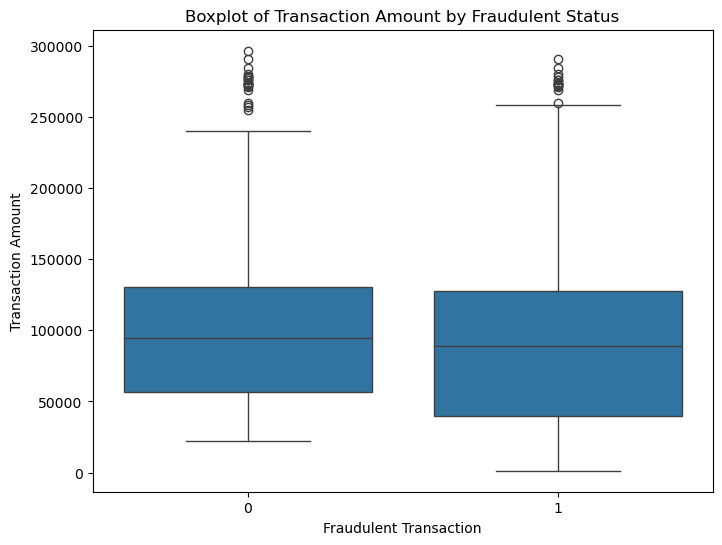

In [28]:
# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='amt', data=result)
plt.xlabel('Fraudulent Transaction')
plt.ylabel('Transaction Amount')
plt.title('Boxplot of Transaction Amount by Fraudulent Status')
plt.show()

In [35]:
result.reset_index()

,index,cc_num,amt,is_fraud
0,1090971,6011367958204270,296436.73,0
1,1025850,4908846471916297,290478.49,0
2,1026999,4908846471916297,290478.49,1
3,1101366,6011438889172900,284013.50,1
4,1100683,6011438889172900,284013.50,0
...,...,...,...,...
1665,310759,38817501916673,3023.40,1
1666,999043,4734310647841293,2494.25,1
1667,1221983,4457136361520330110,2444.53,1
1668,405948,340187018810220,1496.10,1


In [38]:
# Group by 'is_fraud' and calculate the total transaction amount for each category
transaction_totals = result.groupby('is_fraud')['amt'].sum()

# Display the total amount for fraud and valid transactions
print("Total amount for fraud transactions:", transaction_totals[1])
print("Total amount for valid transactions:", transaction_totals[0])

Total amount for fraud transactions: 69690533.23
Total amount for valid transactions: 90780007.79


In [40]:
result['cc_num'].nunique()

983

In [43]:
result['cc_num'].duplicated().value_counts()

cc_num
False    983
True     687
Name: count, dtype: int64

* In total of 983 unique cards 687 cards have fraud transactions (ie., 70% of credit card holders face fraudulent transaction atleast once), which is a huge problem.